Lesson 1 - Fundamentals
====================

## Import libraries


In [0]:
import numpy as np # linear algegra
import pandas as pd # work with data
import seaborn as sns # visualize data

## Basic Python

Assume you flip 5 fair coins (i.e. the probability of a coin landing on one side is 0.5). Write a small function which will determine the _estimated probability_ that at most 3 coins will be heads or exactly 1 coin lands on heads.

In [0]:
def flip_coins():
  trials = 10000
  counter = 0
  for i in range(trials):
    each_try = np.random.randint(0, 2, size=5)
    if sum(each_try) <= 3 and sum(each_try) > 0:
      counter += 1
  return counter / trials

flip_coins()

0.779

Write a function which takes N dice and returns the estimated probability that the total score is greater than 11 or odd.

In [0]:

def dice(n):
  trials = 10000
  counter = 0
  
  for i in range(trials):
    each_try = np.random.randint(1, 7, size=n)
    if i < 5:
      print(each_try)
    if sum(each_try) > 11 or (sum(each_try) % 2 == 1):
      counter += 1
  
  return counter / trials

print(dice(4))

[4 4 2 3]
[2 6 5 4]
[1 6 2 3]
[4 1 3 4]
[5 4 1 3]
0.9059


## Get started in Machine Learning in 5 steps

In this example we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days Thursday to Sunday, dinner or lunch and from different table size.

We want to predict how much tip the waiter will earn based on other parameters.

### Step 1: Import data

In [0]:
data = sns.load_dataset('tips')

#### Overview

In [0]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [0]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
data.sample()

,total_bill,tip,sex,smoker,day,time,size
45,18.29,3.0,Male,No,Sun,Dinner,2


### Step 2: Data analysis

#### What kind of category are there in column 'sex', 'smoker', 'day', 'time'?

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [0]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [0]:
data['sex'].unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [0]:
data['smoker']

0       No
1       No
2       No
3       No
4       No
5       No
6       No
7       No
8       No
9       No
10      No
11      No
12      No
13      No
14      No
15      No
16      No
17      No
18      No
19      No
20      No
21      No
22      No
23      No
24      No
25      No
26      No
27      No
28      No
29      No
      ... 
214    Yes
215    Yes
216    Yes
217    Yes
218    Yes
219    Yes
220    Yes
221    Yes
222    Yes
223     No
224    Yes
225    Yes
226    Yes
227     No
228     No
229    Yes
230    Yes
231    Yes
232     No
233     No
234    Yes
235     No
236    Yes
237    Yes
238     No
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): [Yes, No]

In [0]:
data['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

#### How many woman/man pay for the dish?

In [0]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### Lets find out what is the best day to work – maximum tips (sum and percents)

In [0]:
data2 = data.groupby('day').sum()
data2['percent'] = data2['tip'] / data2['total_bill'] * 100
data2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


#### Who eats more (and tips more)? smokers or non smokers?

In [0]:
data3 = data.groupby('smoker').sum()
data3['percent'] = data3['tip'] / data3['total_bill'] * 100
data3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


### Step 3: Data vizualization

Let's draw some seaborn graph

#### Tables per day

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


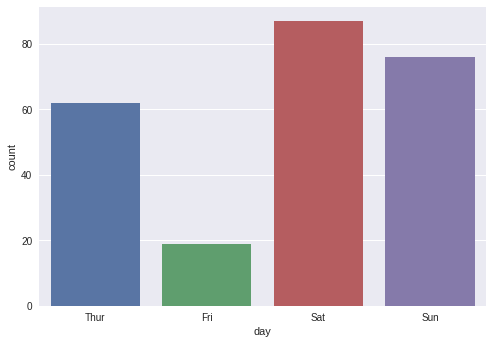

In [0]:
sns.countplot(x='day', data=data)

#### Tables per day per gender


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


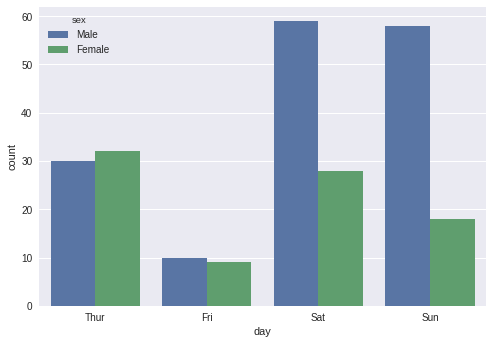

In [0]:
sns.countplot(x='day', data=data, hue='sex')

#### Table lunch vs dinner

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


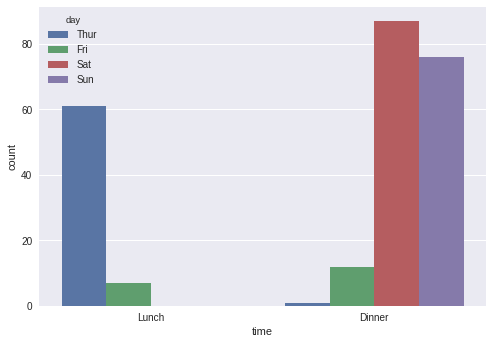

In [0]:
sns.countplot(x='time', data=data, hue='day')

### Step 4: Transform and clean the data

Before we start building our model, we need to convert all the text values into numbers. 

#### Convert sex and smoker to values

In [0]:
input_data = data.replace({'sex': {'Male': 0, 'Female': 1}, 'smoker': {'No': 0, 'Yes': 1}, 'time': {'Lunch': 0, 'Dinner': 1}})
input_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,1,2
1,10.34,1.66,0,0,Sun,1,3
2,21.01,3.50,0,0,Sun,1,3
3,23.68,3.31,0,0,Sun,1,2
4,24.59,3.61,1,0,Sun,1,4
5,25.29,4.71,0,0,Sun,1,4
6,8.77,2.00,0,0,Sun,1,2
7,26.88,3.12,0,0,Sun,1,4
8,15.04,1.96,0,0,Sun,1,2
9,14.78,3.23,0,0,Sun,1,2


#### Handle categorical variable

The values in day column are:  Thu, Fri, Sat, Sun we can convert it to 1,2,3,4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies.

In [0]:
input_data_final = pd.get_dummies(input_data, columns=['day'], drop_first=True)
input_data_final.head()
input_data_final.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'day_Fri',
       'day_Sat', 'day_Sun'],
      dtype='object')

### Step 5: Building our Machine Learning model

Now we are going to build our model with Linear Regression Model. First we create a list of features as X and predicted as Y:

In [0]:
y = input_data_final['tip']
X = input_data_final[['sex', 'smoker', 'time', 'size', 'day_Fri', 'day_Sat', 'day_Sun']]

Now lets split the data into test and train so we can test our model before we use it.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(195, 7) (49, 7)


Now lets train the model with X_train and y_train:

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

And predict the X_test values:

In [0]:
predictions = model.predict(X_test)
predictions

array([2.51326397, 2.57306163, 2.67485656, 3.78234484, 3.11221868,
       2.57306163, 3.91331396, 2.71246095, 2.68623036, 2.46832311,
       2.50189017, 2.51326397, 2.46832311, 2.71246095, 2.74602802,
       2.50189017, 2.68623036, 2.74602802, 2.46832311, 3.17201634,
       2.50189017, 2.78145041, 2.74602802, 2.44209252, 2.68623036,
       2.57306163, 2.51326397, 2.78145041, 3.80857544, 3.20962073,
       3.35635652, 3.41615418, 2.51326397, 5.19376863, 2.68623036,
       2.46832311, 3.91331396, 2.51326397, 3.2431878 , 3.80857544,
       2.80153749, 3.18339014, 3.2431878 , 4.54987306, 4.02648269,
       2.67485656, 2.53949457, 3.8535163 , 2.71246095])

We can look at the predictions and compare it with y_test

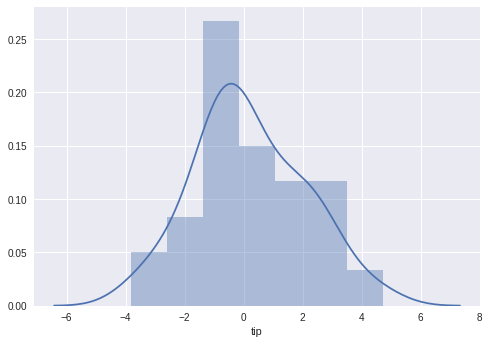

In [0]:
sns.distplot(y_test - predictions)

We can see from the graph that most of the times the predictions were correct (difference = 0).

If we want to predict new value for example.

We have a 3 size table smoker male on friday lunch:


In [0]:
# [['sex', 'smoker', 'time', 'size', 'day_Fri', 'day_Sat', 'day_Sun']]
vals = np.array([0, 1, 0, 3, 1, 0, 0]).reshape(1, -1)
vals
model.predict(vals)

array([3.1183622])